# Perceptron

L'algoritmo **perceptron** prende in input un training set $D$ composto da $n$ esempi $x^{(1)},...,x^{(n)}$ ciascuno in $R^d$ con relative classi $y^{(1)},...,y^{(n)}$ ciascuno in $\{-1, +1\}$; l'algorirmo ritorna, se esiste, un iperpiano che separe le istanze positive da quelle negative. Quindi l'algorimo ritorna (o addestra) un classificatore binario usando $D$. Il parametro $t$ è il numero massimo di iterazioni consentite.

![perceptron](./perceptron.png)

- i parametri $a$ e $a_0$ vengono aggiornati se $x^{(i)}$ non viene classificato correttamente.
- l'aggiornamento è definito in modo che $x^{(i)}$ sia "classificato meglio"
- se un piano separatore esiste, questo viene trovato (se $t$ è grande a sufficienza)

## Implementazione

La funzione prende in input:

- `X`, un vettore (`ndarray`) di `d` righe e e `n` colonne, una colonna per punto.
- `y`, il vettore delle `n` etichette
- `t`, il numero massimo di iterazioni che eseguirà l'algoritmo

In [2]:
import numpy as np

def perceptron( X, y, t ):
    '''
    Parameters
    ----------
    X : vettore (ndarray) d x n dove d è lo spazio delle features, n numero degli esempi
    y : vettore delle etichette, di dimensione n
    t : intero positivo, numero massimo di iterazioni

    Returns
    -------
    a : vettore dei cefficienti dell'iperpiano di dimensione d
    a0: termine noto
    '''
    
    d, n = X.shape  # ritorna il numero di righe e colonne di X
    
    a = np.zeros( (d, 1) ) # array colonna di d zeri
    a0 = 0
    
    for j in range(t):
        finito = True
        for i in range(n):
            x = X[:,i:i+1] # colonna i di X ottenuta con slicing
            if y[i]*(a.T.dot(x) + a0) <= 0:
                a = a + x*y[i]
                a0 = a0 + y[i]
                finito = False
        if finito: # equivalente a finito == True
            break
                
    return a, a0

## Esempio nello spazio delle features bi-dimensionale

Iniziamo col definire `X` come una lista di punti nello spazio Euclidea di dimensione 2.

```python
np.array(X)
```

converte la lista `X` in un `ndarray` di `n` righe e `2` colonne. Il vettore risultante viene trasposto con l'operatore `.T`.

Il vettore delle features viene definito in modo analogo.

In [11]:
X = [  [1, -1 ], [0.5, 1], [-.6, -.7], [-.8, 0.5]  ]
X = np.array(X).T
y = np.array([1, -1, 1, -1])

a, a0 = perceptron(X, y, 100)

print(a, a0)

[[ 0.5]
 [-2. ]] 0


In [13]:
import matplotlib.pyplot as plt

def plot_separation(X, y, a, a0, name=None):
    '''
    Input: X vettore 2xn dove la colonna j rappresenta il punto j nello spazio delle features
        y: vettore di dimensione n, y[j] è l'etichetta di X[:,j:j+1] (colonna j di X)
        a: vettore 2x1
        a0: float, rappresentano i coefficienti del piano di separazione
    Output: None, crea un file png che mostra lo spazio delle features e il piano di separazione
    '''
    plt.scatter(X[0:1,:], X[1:2,:], c=['g' if lab == 1 else 'r' for lab in y], s=7)
     
    ax = plt.gca()
    
    # piano di separazione
    xlim_left, xlim_right = ax.get_xlim()
    ylim_bottom, ylim_top = ax.get_ylim()
    
    plt.plot( ( xlim_left, xlim_right) , [ (-x*a[0][0]-a0)/a[1][0] for x in  (xlim_left, xlim_right) ],\
             linewidth=1,
             c = 'b', zorder=0 ) # a0 è una matrice di dimensione 1x1
     
    arrow_size = 0.05
   
    # assi 
    plt.arrow( xlim_left, 0, xlim_right-xlim_left, 0,   width=0.01,\
              head_width= arrow_size, length_includes_head=True,\
              color='lightgrey', zorder=-1)
    plt.arrow( 0, ylim_bottom, 0, ylim_top-ylim_bottom,   width=0.01,\
              head_width= arrow_size, length_includes_head=True,\
              color='lightgrey', zorder=-1)    


    # plot del vettore perpendicolare al piano
    
    # punto centrale del piano
    mx = (xlim_left+xlim_right)/2
    my = (-mx*a[0][0]-a0)/a[1][0]

    
    
    u = a/np.linalg.norm(a) # vettore unitario ortogonale ad a
    
    # spostiamo l'origine del vettore a sul punto (mx, my) 
    plt.arrow(mx, my, u[0][0], u[1][0], width=0.01,\
              head_width= arrow_size, length_includes_head=True,\
              color='orange', zorder=0)
    
        
    
    ax.set_aspect('equal', adjustable='box')
    
    ax.set_xbound(xlim_left, xlim_right)
    ax.set_ybound(ylim_bottom, ylim_top)
    
    if name != None:
        plt.savefig(name, dpi=600)

    plt.show()
    

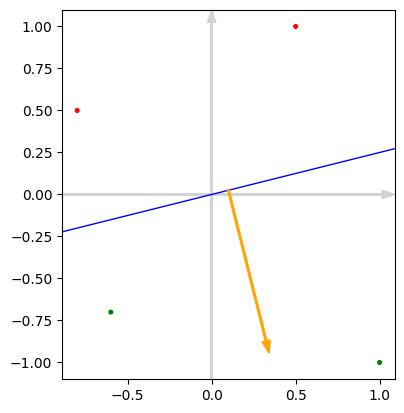

In [14]:
a, a0 = perceptron(X, y, 100)
plot_separation(X, y, a, a0)